## These are examples of how to use pobability distributions for quantitative discrete data, including discrete uniform, bernoulli, binomial, negative binomial and poisson, with Python, Pandas, NumPy and Matplotlib

* the formulas shown at this notebook have been taken from the following reference:<br>
FÁVERO, L. P.; BELFIORE, P. **Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®**. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.<br>
Available in Brazil at:<br>
https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

In [1]:
# importing libs and setting default plot style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas as pd
import numpy as np
from scipy import stats
from functools import reduce
import math

### Uniform Discrete Distribution

In [2]:
# we have a uniform discrete distribution when the probability of results for all possible event outcomes is exactly the same. In the 
# fomula below, "n" represents the number of possible results, all of them with the same exact probability to occur.

![uniform-discrete](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/uniform-discrete.png)

In [3]:
# Case: what's the probability for rolling each face of a 6-sided regular die ? Observe that the probability for each face
# to be rolled is exactly the same 1/6 (=0.166667). This is an example of a uniform discrete distribution.

die_dataframe = pd.DataFrame(columns=["DIE_FACE","PROBABILITY"])
die_dataframe['DIE_FACE'] = [1,2,3,4,5,6]
die_dataframe['PROBABILITY'] = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
die_dataframe

,DIE_FACE,PROBABILITY
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


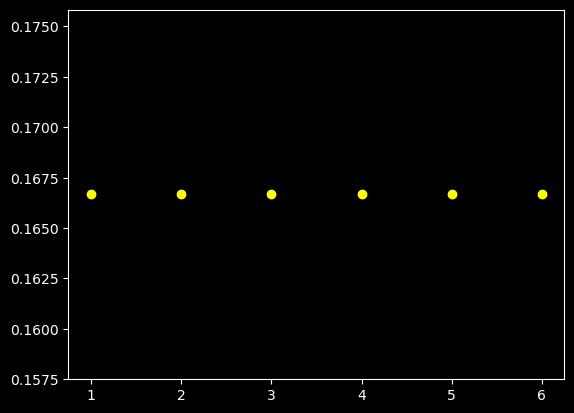

In [4]:
# creating the scatter graph for all events' probabilities - it's always the same probability
plt.scatter(die_dataframe["DIE_FACE"], die_dataframe["PROBABILITY"], color="yellow");

### Bernoulli Distribution

In [5]:
# we have a Bernoulli distribution when we have only two possible outcomes for an event, either success (1) or failure (0). And the event
# occurs only once - only 1 trial. The probability "p" of the success event is always the same, as the probability "1-p" of the failure 
# event. We can then calculate the probability of sucess (p) or failure (1-p) to happen on this single-event experiment. From Bernoulli
# distributions derive the other two next distributions below: binomial and negative binomial distributions.

![bernoulle](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/bernoulli.png)

In [6]:
# Case: a candidate is about to take an exam. The probebility to pass the exam, empirically, was calculated as 48%. What's the 
# probabilities for the candidate to pass or fail the test ?

x_0 = 0.48**0*(1-0.48)**(1-0)
x_1 = 0.48**1*(1-0.48)**(1-1)
x_1_cumulative = x_0+x_1

print(f"The pobabilities of failing or passing a one-try exam by the candidate are {x_0} and {x_1}, respectively. The accumulated probability at x=1 is {x_1_cumulative} or {int(x_1_cumulative)*100}%.")

The pobabilities of failing or passing a one-try exam by the candidate are 0.52 and 0.48, respectively. The accumulated probability at x=1 is 1.0 or 100%.


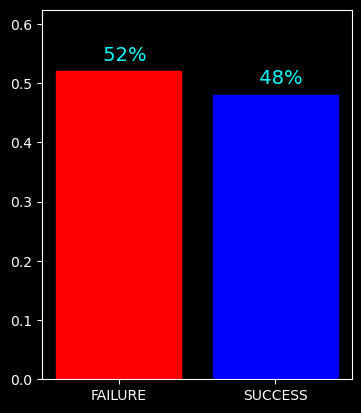

In [7]:
# creating a bar graph with the two probabilities for the two mutually exclusive events, considered that only one of them may occur, as
# we may have only one event (outcome) for the experiment.

fig, ax = plt.subplots()
bar_container = ax.bar(x=[0,1], height=[x_0, x_1], width=0.8)
bar_container[0].set_color("red")
bar_container[1].set_color("blue")
ax.set_xticks([0,1])
ax.set_xticklabels(["FAILURE", "SUCCESS"])
ax.set_ymargin(0.2)
ax.bar_label(ax.containers[0], label_type="edge", color="aqua", padding=5, size=14, fmt=lambda x:'  {:.0f}%'.format(x*100))
fig.set_figwidth(4)

In [8]:
# or:

In [9]:
# using scipy stats bernoulli pmf() and cdf() methods to calculate the same above, directly from (x, p)
# pmf() is the Probability mass function, that calculates the prob for x at that certain point
# cdf() is the Cumulative distribution function, that calculates the cumulative prob for all xs, from 0 until the passed x argument
# as here we have only x=0 or x=1 (anything outside this range will generate a NaN result), the cumulative at x=1 is the pmf at x=0 + pmf 
# at x=1 which must be 1 or 100%... that is, the sum of probabilities of the only two possible events

my_bernoulli_x0 = stats.bernoulli.pmf(0,0.48)
my_bernoulli_x1 = stats.bernoulli.pmf(1,0.48)
my_bernoulli_x1_cumulative = stats.bernoulli.cdf(1,0.48)

print(f"The pobabilities of failing or passing a one-try exam by the candidate are {my_bernoulli_x0} and {my_bernoulli_x1}, respectively. The accumulated probability at x=1 is {my_bernoulli_x1_cumulative} or {int(my_bernoulli_x1_cumulative)*100}%.")

The pobabilities of failing or passing a one-try exam by the candidate are 0.52 and 0.48, respectively. The accumulated probability at x=1 is 1.0 or 100%.


### Binomial Distribution

In [10]:
# we have a binomial distribution when we have independent fixed number "n" of repetitions of Bernoulli experiment, with the same 
# probability "p" for all "k" successful events to occur. We wanna know the probability of achieving a k-number of success events 
# for a fixed number of n trials. Or, for a given number "n" of fixed trials, what's the probability of achieving "k" successes ? 
# Number of failure events are (n-k), and the probability for each failure event is (1-p). n is fixed, k varies along with what 
# probability is being requested. At the graph, k is the x-axis values... and y-axis is the probability for each k. We're interested
# in the varying number of sucesses and their probabilities for a fixed n number of trials and a fixed p for each successful event.

![binomial](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/binomial.png)

In [11]:
# creating functions to calculate manually the factorial, the Newton binomial factor and the Binomial Distribution probability

def my_binomial_dist_prob_calc(n, k, p, cumulative=False):
    '''
    Created by: Daniel Pinheiro, https://danielpm1982.com, https://github.com/danielpm1982
    
    Parameters
    ----------
    n (int): total number of events in the experiments, at a certain period of time or space area;
    k (int): number of successful events among all n total events, at the same time period or space area as n;
    p (float): constant probability (based on historical data) of having a single sucessful event, at the same time period or space area as n and k;
    cumulative (bool): set cumulative parameter to True if you want the sum of all probabilities (AUC) since 0 until that k you've set, or False, if you simply wish the probability at that specific k point of the x axis of the Binomial Distribution.
    
    Returns
    -------
    result (float): the Binomial Distribution probability value requested for an experiment with n total number of events, k number of successful events and p constant probability of a successful event to occur.
    
    Notes
    -----
    number of failure events = n-k;
    probability of failure events = 1-p;
    each event follows Bernoulli distribution in the fact that a sucessful or failure event will either and allways occur (boolean events), therefore prob_success(p)+prob_failure(1-p) is always 1 or 100%;
    this function contains two inner functions for calculating factorials and Newton's binomials, both not described at this docstring.
    '''
    def inner_factorial(z):
        if z<=1:
            return 1
        else:
            return z*inner_factorial(z-1)
    def inner_binomial_coefficient(w,t):
        return (inner_factorial(w))/(inner_factorial(t)*inner_factorial(w-t))
    if(not cumulative):
        result = inner_binomial_coefficient(n,k)*(p**k)*((1-p)**(n-k))
    else:
        cumulator = 0
        for i in range(0,k+1,1):
            cumulator+=inner_binomial_coefficient(n,i)*(p**i)*((1-p)**(n-i))
        result = cumulator
    return result

In [12]:
# Case: based on historical data, it is known at an industry, that the fixed probability of finding at least one defective part in each 
# lot (during production) is 6.5% (p). This is therefore the success event we wanna consider in quality assurance (finding a defective 
# product in a lot - and, thus, a defective lot). Each month, 12 lots (n) are produced. Regarding the number of sucessful events k 
# among all n events:
# A - what's the probability of fiding defective products in 2 lots in a month ?
# B - what's the probability of finding defective products in 4 lots in a month ?
# C - what's the probability of finding defective products in at most 2 lots in a month ?

# A - for k=2 (two successful events in a month), n=12 (twelve total events in a month) and p=0.065 (probability of each k = 6.5%), we have:
p_k_2 = my_binomial_dist_prob_calc(12, 2, 0.065)

# B - for k=4, n=12 and p=0.065, we have:
p_k_4 = my_binomial_dist_prob_calc(12, 4, 0.065)

# C - for k=2, n=12 and p=0.065, but in this case cumulating all probs from k=0 until k=2, we have:
p_k_2_cumulative = my_binomial_dist_prob_calc(12, 2, 0.065, cumulative=True)

print(f"For k=2, n=12, p=0.065, cumulative=False, the binomial probability is {p_k_2*100:.2f}%")
print(f"For k=4, n=12, p=0.065, cumulative=False, the binomial probability is {p_k_4*100:.2f}%")
print(f"For k=2, n=12, p=0.065, cumulative=True, the binomial probability is {p_k_2_cumulative*100:.2f}%")

For k=2, n=12, p=0.065, cumulative=False, the binomial probability is 14.24%
For k=4, n=12, p=0.065, cumulative=False, the binomial probability is 0.52%
For k=2, n=12, p=0.065, cumulative=True, the binomial probability is 96.12%


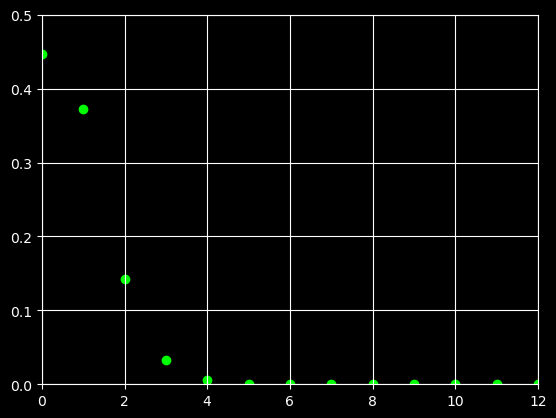

In [13]:
# creating a sample Series of probabilities of Binomial Distribution type simply to plot that in a sample Matplotlib chart
# using the same n=12 and p=0.065 and a list of k(s) from 0 until 12.
k_list = list(range(0,13))
k_list_prob_result_list = list(map(lambda k:my_binomial_dist_prob_calc(12,k,0.065,False), k_list))
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlim(k_list[0],k_list[len(k_list)-1])
ax.set_ylim(0,0.5)
ax.scatter(k_list, k_list_prob_result_list, color="lime");

In [14]:
# or:

In [15]:
# using scipy stats binon pmf() and cdf() methods to calculate the same A, B and C items above directly from (k,n,p)
# pmf() is the Probability mass function, that calculates the prob for a k at that certain point
# cdf() is the Cumulative distribution function, that calculates the cumulative prob for all ks, from 0 until the passed k argument
my_binomial_n=12
my_binomial_p=0.065
my_binomial_k_2 = stats.binom.pmf(2,my_binomial_n,my_binomial_p)
my_binomial_k_4 = stats.binom.pmf(4,my_binomial_n,my_binomial_p)
my_binomial_k_2_cumulative = stats.binom.cdf(2, my_binomial_n, my_binomial_p)

print(f"For k=2, n=12, p=0.065, cumulative=False, the binomial probability is {my_binomial_k_2*100:.2f}%")
print(f"For k=4, n=12, p=0.065, cumulative=False, the binomial probability is {my_binomial_k_4*100:.2f}%")
print(f"For k=2, n=12, p=0.065, cumulative=True, the binomial probability is {my_binomial_k_2_cumulative*100:.2f}%")

For k=2, n=12, p=0.065, cumulative=False, the binomial probability is 14.24%
For k=4, n=12, p=0.065, cumulative=False, the binomial probability is 0.52%
For k=2, n=12, p=0.065, cumulative=True, the binomial probability is 96.12%


### Negative Binomial Distribution

In [16]:
# we have a negative binomial distribution when, differently from the binomial distribution, we have a varying number "n" of total trials,
# here called x (because it consists in the x-axis values now) until a certain fixed and pre-defined "k" number of sucessful events is 
# reached. Until all "k" successes are reached, the experiment is incomplete, and keeps repeating itself, therefore the "n" represents the 
# total number of failures before a certain and total number of successes is reached. The failure here does not mean the failed outcome of 
# a single trial, but the fact of not having reached yet the full and total successfull outcomes requested. Until all successes are reached, 
# the experiment keeps failing (even with some punctual successes). Here we have a predefined number of successes that must be reached and 
# we wanna know the probability of reaching that total k-number successes after "n" trials. The x-axis is the "n" and the y-axis is the 
# probability that, at that "n", we have reached all successes requested, for considering the experiment, as a whole, a success, and 
# concluded. Each event will only end when that fixed k-number of successes is reached... what varies is the number of "n" (along the 
# x-axis) and the probability of having had, at that "n", all fixed k successes reached. The "negative" here is semantical, not numerical, 
# and basically emphasizes the contrast that, here, what varies, and what we're interested in, is the number of failures, instead of the 
# number of successes.

![binomial-negative](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/binomial-negative.png)

In [17]:
# creating functions to calculate manually the factorial, the Newton binomial factor and the Negative Binomial Distribution probability

def my_negative_binomial_dist_prob_calc(x, k, p, cumulative=False):
    '''
    Created by: Daniel Pinheiro, https://danielpm1982.com, https://github.com/danielpm1982
    
    Parameters
    ----------
    x (int): total number of events until the k number of sucesses is reached, at an experiment, at a certain period of time or space area. x >= k, necessarily, because you couldn't have more k successful events (1 success at most per event) for a lower number of total events x - in the most optimal case, you'd have the same number of those, that is, you would have had k successful outcomes for all x trials;
    k (int): fixed number of successful events to be reached after x trials, in order to conclude the experiment, at the same time period or space area as x;
    p (float): constant probability (based on historical data) of having a single sucessful event, at the same time period or space area as x and k;
    cumulative (bool): set cumulative parameter to True if you want the sum of all probabilities (AUC) since the first minimally possible x (x=k) until that x you've set, or False, if you simply wish the probability at that single specific x point of the x axis of the Negative Binomial Distribution.
    
    Returns
    -------
    result (float): the Negative Binomial Distribution probability for an experiment having reached all k successful events with x total number of trials, being "p' the constant probability of a successful event to occur, independently. Or nan for undefined results (invalid x values).
    
    Notes
    -----
    number of single failed trials until total successful trials are reached = x-k;
    probability of single failed events = 1-p;
    each event follows Bernoulli distribution in the fact that a sucessful or failure event will either and always occur (boolean events), therefore prob_single_success(p) + prob_single_failure(1-p) is always 1 or 100%
    this function contains two inner functions for calculating factorials and Newton's binomials, both not described at this docstring.
    '''
    def inner_factorial(z):
        if z<=1:
            return 1
        else:
            return z*inner_factorial(z-1)
    def inner_binomial_coefficient(w,t):
        return (inner_factorial(w))/(inner_factorial(t)*inner_factorial(w-t))
    if(x>=k):
        if(not cumulative):
            result = inner_binomial_coefficient(x-1,k-1)*(p**k)*((1-p)**(x-k))
        else:
            cumulator = 0
            for i in range(k,x+1,1):
                cumulator+=inner_binomial_coefficient(i-1,k-1)*(p**k)*((1-p)**(i-k))
            result = cumulator
    else:
        print(f"invalid x number for the defined number of k ! Number of successful events (k) can't be higher than total number of events (x) !")
        result = np.nan
    return result

In [18]:
# Case: based on historical data, it is known, at a toy machine, that the fixed probability of picking up a prize with the machine 
# mechanical hand is 11% (p). Regarding the number of total trials x needed to succesfully pick up k toy prizes at the same machine:
# A - what's the probability of needing 10 trials to capture 3 toy prizes ?
# B - what's the probability of needing 20 trials to capture 3 toy prizes ?
# C - what's the probability of needing up to 5 trials (5 or less) to capture 1 toy prize ?

# A - for x=10 (ten total events), k=3 (three successful events) and p=0.11 (probability of each k = 11%), we have:
p_x_10 = my_negative_binomial_dist_prob_calc(10, 3, 0.11)

# B - for x=20 (twenty total events), k=3 (three successful events) and p=0.11 (probability of each k = 11%), we have:
p_x_20 = my_negative_binomial_dist_prob_calc(20, 3, 0.11)

# C - for x=5 (at most five total events), k=3 (three successful events) and p=0.11 (probability of each k = 11%), cumulative = True, we have:
p_x_5 = my_negative_binomial_dist_prob_calc(5, 1, 0.11, True)

print(f"For x=10, k=3, p=0.11, cumulative=False, the negative binomial probability is {p_x_10*100:.2f}%")
print(f"For x=20, k=3, p=0.11, cumulative=False, the negative binomial probability is {p_x_20*100:.2f}%")
print(f"For x=5, k=1, p=0.11, cumulative=True, the negative binomial probability is {p_x_5*100:.2f}%")

For x=10, k=3, p=0.11, cumulative=False, the negative binomial probability is 2.12%
For x=20, k=3, p=0.11, cumulative=False, the negative binomial probability is 3.14%
For x=5, k=1, p=0.11, cumulative=True, the negative binomial probability is 44.16%


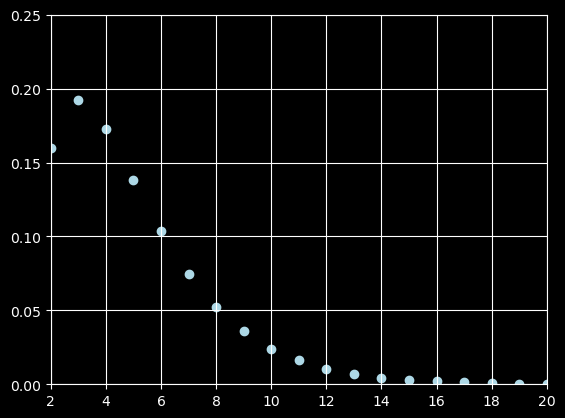

In [19]:
# creating a sample Series of probabilities of Negative Binomial Distribution type simply to plot that in a sample Matplotlib chart
# using k=2 and p=0.4 with a list of x from minimum 2 (minimum = k) until 20.
x_list = list(range(2,21))
x_list_prob_result_list = list(map(lambda x:my_negative_binomial_dist_prob_calc(x,2,0.4,False), x_list))
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xticks(range(2,(x_list[len(x_list)-1])+1,2))
ax.set_xlim(2,x_list[len(x_list)-1])
ax.set_ylim(0,0.25)
ax.scatter(x_list, x_list_prob_result_list, color="lightblue");

In [20]:
# or:

In [21]:
# using scipy stats nbinon pmf() and cdf() methods to calculate the same A, B and C items above directly from x, k and p
# pmf() is the Probability mass function, that calculates the prob for each x at that certain point
# cdf() is the Cumulative distribution function, that calculates the cumulative prob for all xs, from the minimum x=k until the passed 
# IMPORTANT: because scipy.stats.nbinom uses an alternative formula, other than the one we used above, in nbinon pmf() and cdf() methods, 
# the first parameter is NOT x (all trials before experiment achieves all k successes), but only the single failures sum, that is, (x-k). 
# The other two parameters are k and p, as expected. Be careful not to use x in place of (x-k), or results will be wrong.

my_neg_binomial_x_10 = stats.nbinom.pmf((10-3),3,0.11)
my_neg_binomial_x_20 = stats.nbinom.pmf((20-3),3,0.11)
my_neg_binomial_x_5_cumulative = stats.nbinom.cdf((5-1), 1, 0.11)

print(f"For x=10, k=3, p=0.11, cumulative=False, the negative binomial probability is {my_neg_binomial_x_10*100:.2f}%")
print(f"For x=20, k=3, p=0.11, cumulative=False, the negative binomial probability is {my_neg_binomial_x_20*100:.2f}%")
print(f"For x=5, k=1, p=0.11, cumulative=True, the negative binomial probability is {my_neg_binomial_x_5_cumulative*100:.2f}%")

For x=10, k=3, p=0.11, cumulative=False, the negative binomial probability is 2.12%
For x=20, k=3, p=0.11, cumulative=False, the negative binomial probability is 3.14%
For x=5, k=1, p=0.11, cumulative=True, the negative binomial probability is 44.16%


### Poisson Distribution

In [22]:
# we use Poisson distributions to calculate the probability of a given (typically rare) number of successful "k" events to happen in a 
# fixed interval of time or area, if these events occur with a known constant mean rate (lambda) and independently of the time since the 
# last event. The lambda is the variable at which it is set the estimated event occurences per exposal interval (time or area) - based on
# historical data. And we wanna calculate the probability of one or more defined "k" events to happen in a future same period of time / 
# area (as lambda). If the time or area intervals differ between lambda and the one requested for the probability calculation, just adjust 
# the input data to proportionally correspond to the exact same time period or area of lambda.

![poisson](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/poisson.png)

In [23]:
# creating functions to calculate manually the factorial and the Poisson Distribution probability

def my_poisson_dist_prob_calc(k, the_lambda):
    def inner_factorial(z):
        if z<=1:
            return 1
        else:
            return z*inner_factorial(z-1)
    return (math.e**(-1*the_lambda)*the_lambda**k)/inner_factorial(k)

In [24]:
# case: at a pharmaceutical doctor's office, a Clinical Pharmaceutical Doctor (PharmD), specialized both in Clinical Pharmacy as in 
# Clinical Pathology, detected that, each year, he had returned 2 specific patients, with a rare genetic disease, looking for specialized
# pharmaceutical consultation and care. Both these patients are in need of advanced pharmaceutical analysis and interventions, complex 
# pharmaceutical independent prescribing, as well as specialized investigation of current and future diseases' staging, complications and 
# co-morbities, only diagnosable through Clinical Pathology exams. Regarding the probability of receiving patients with that same rare
# genetic disease (including these two), it is asked:
# A - the probability that the Pharmaceutical Doctor receives one patient with that same disease during the next year ?
# B - the probability that the Pharmaceutical Doctor receives three patients with that same disease during the next year ?
# C - the probability that the Pharmaceutical Doctor receives no patient with that same disease during the next year ?
# D - the probability that the Pharmaceutical Doctor receives ten patients with that same disease during the next 2 years ?

# A - for k=1 and lambda=2, we have:
p_k_1 = my_poisson_dist_prob_calc(1, 2)

# B - for k=3 and lambda=2, we have:
p_k_3 = my_poisson_dist_prob_calc(3, 2)

# C - for k=0 and lambda=2, we have:
p_k_0 = my_poisson_dist_prob_calc(0, 2)

# in this case adapting the question to the same time period of the lambda to keep proportionality
# 10 in 2 years = 5 in 1 year
# D - for k=5 and lambda=2, we have:
p_k_5 = my_poisson_dist_prob_calc(5, 2)

print(f"For k=1, lambda=2, the poisson probability is {p_k_1*100:.2f}%")
print(f"For k=3, lambda=2, the poisson probability is {p_k_3*100:.2f}%")
print(f"For k=0, lambda=2, the poisson probability is {p_k_0*100:.2f}%")
print(f"For k=5, lambda=2, the poisson probability is {p_k_5*100:.2f}%")


For k=1, lambda=2, the poisson probability is 27.07%
For k=3, lambda=2, the poisson probability is 18.04%
For k=0, lambda=2, the poisson probability is 13.53%
For k=5, lambda=2, the poisson probability is 3.61%


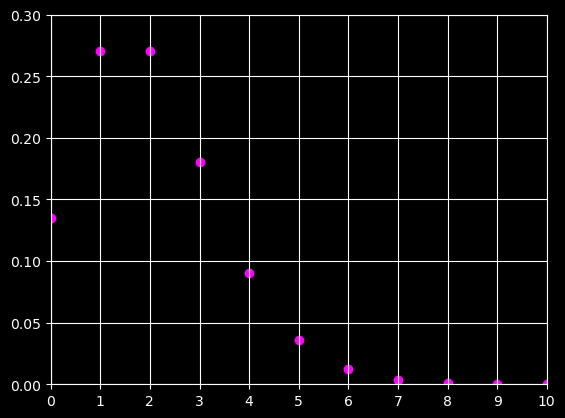

In [25]:
# creating a sample Series of probabilities of Poisson Distribution type simply to plot that in a sample Matplotlib chart
# using lambda=2 with a list of k from 0 until 10.
k_list = list(range(0,11))
k_list_prob_result_list = list(map(lambda x:my_poisson_dist_prob_calc(x,2), k_list))
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xticks(range(0,(k_list[len(k_list)-1])+1))
ax.set_xlim(0,k_list[len(k_list)-1])
ax.set_ylim(0,0.30)
ax.scatter(k_list, k_list_prob_result_list, color="fuchsia");

In [26]:
# or:

In [27]:
# using scipy stats poisson() method to calculate the same A, B, C and D items above directly from k and lambda

my_poisson_k_1 = stats.poisson.pmf(1,2)
my_poisson_k_3 = stats.poisson.pmf(3,2)
my_poisson_k_0 = stats.poisson.pmf(0,2)
my_poisson_k_5 = stats.poisson.pmf(5,2)

print(f"For k=1, lambda=2, the poisson probability is {my_poisson_k_1*100:.2f}%")
print(f"For k=3, lambda=2, the poisson probability is {my_poisson_k_3*100:.2f}%")
print(f"For k=0, lambda=2, the poisson probability is {my_poisson_k_0*100:.2f}%")
print(f"For k=5, lambda=2, the poisson probability is {my_poisson_k_5*100:.2f}%")


For k=1, lambda=2, the poisson probability is 27.07%
For k=3, lambda=2, the poisson probability is 18.04%
For k=0, lambda=2, the poisson probability is 13.53%
For k=5, lambda=2, the poisson probability is 3.61%
